In [2]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE

In [3]:
data = pd.read_csv('energydata_complete.csv')
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


Text(0.5, 0, 'Appliances Wh')

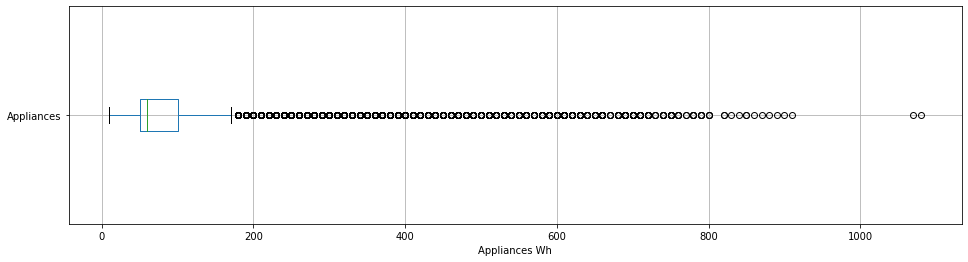

In [3]:
ax = data.boxplot(column=['Appliances'], vert=False, figsize =(16,4))
ax.set_xlabel("Appliances Wh")

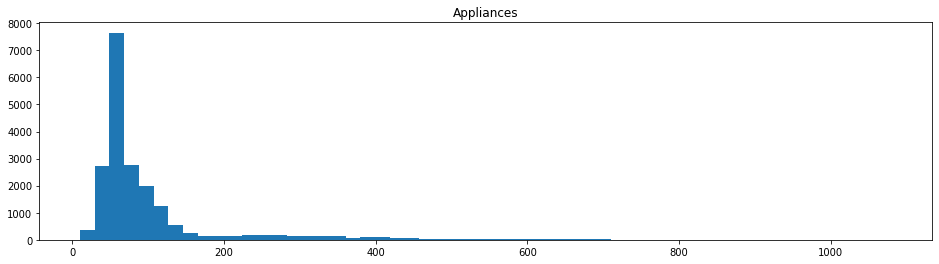

In [4]:
ax = data.hist(column=['Appliances'], grid=False,figsize = (16,4), bins=55)

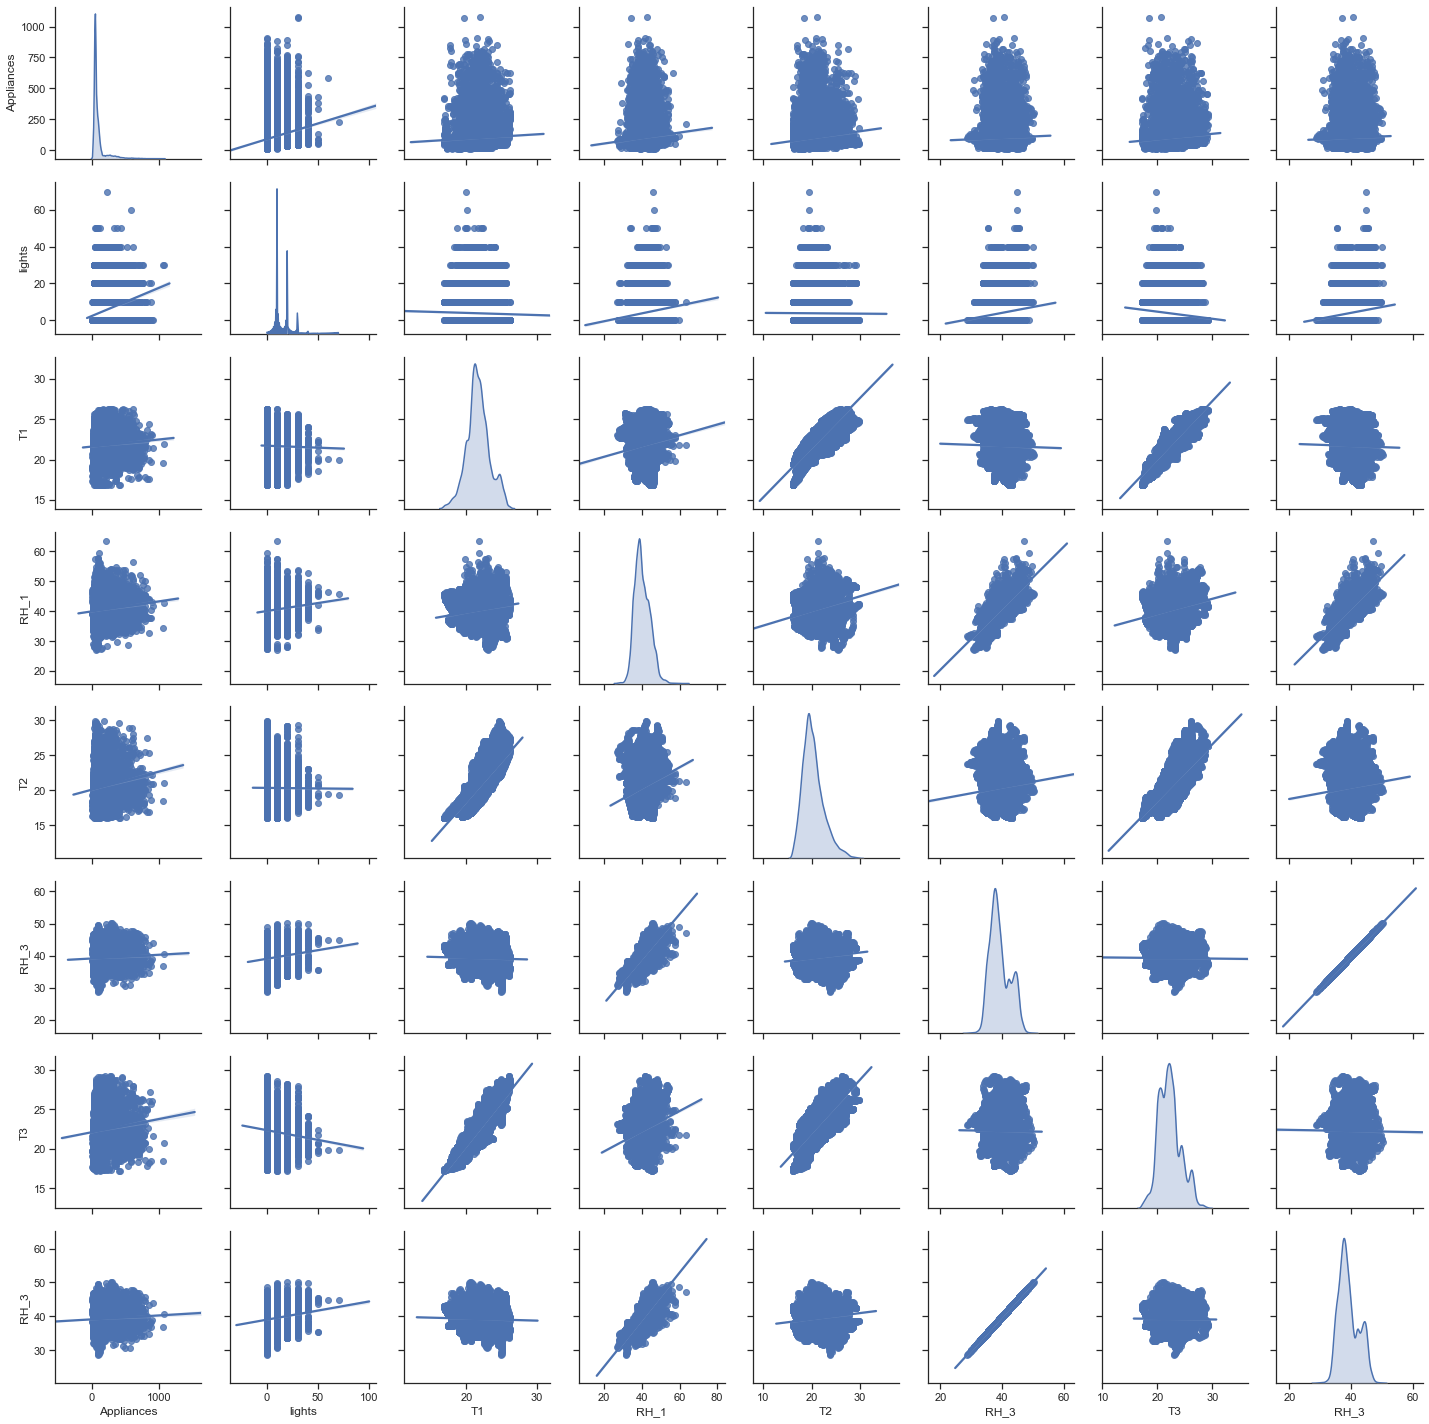

In [5]:
sns.set(style="ticks", color_codes=True)

sns.pairplot(data,x_vars=['Appliances',
'lights', 'T1', 'RH_1', 'T2', 'RH_3','T3','RH_3'],y_vars=['Appliances',
'lights', 'T1', 'RH_1', 'T2', 'RH_3','T3','RH_3'], diag_kind="kde", kind = "reg")

In [15]:
nonnulldata = data.notnull()

nonnulldata.index

asd = nonnulldata.pivot_table(columns = ['date','Appliances'])
asd = asd.corr()

sns.heatmap(asd)
#heat_map = sns.heatmap(nonnulldata[['date','Appliances']], annot=True)
plt.show()


TypeError: corr() missing 1 required positional argument: 'other'

In [13]:
feature_cols = ['Appliances']
X = data[feature_cols]
y = data['lights'] 

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print("y = ", model.coef_, "* x + ", model.intercept_) 

y =  [0.01527036] * x +  2.310037389067058


In [15]:
xmin = X.min()
ymin = model.coef_[0] * xmin + model.intercept_
xmax = X.max()
ymax = model.coef_[0] * xmax + model.intercept_

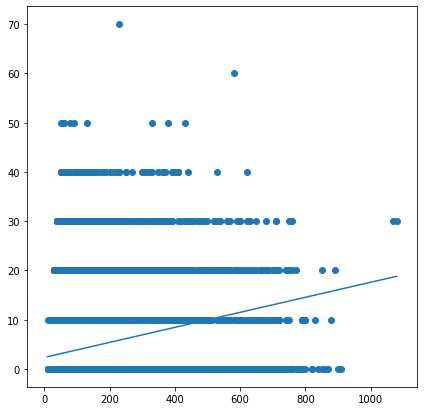

In [16]:
plt.figure(figsize=(7,7))
plt.plot([xmin, xmax], [ymin, ymax])  # single line
plt.scatter(X, y)  # original data 

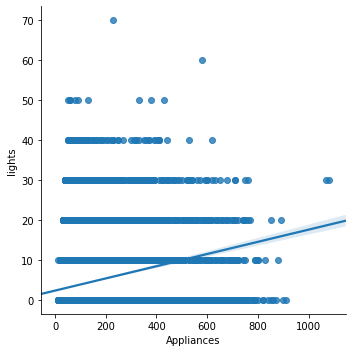

In [17]:
p = sns.lmplot('Appliances', 'lights', data, height=5)


In [20]:
mse = ((y - model.predict(X))**2).mean()
print(mse, np.sqrt(mse))

60.525752950082826 7.779829879250755


In [21]:
from sklearn.metrics import mean_squared_error, r2_score

predicted = model.predict(X)
print("MSE:", mean_squared_error(y, predicted))
print("R^2:", r2_score(y, predicted))

MSE: 60.52575295008528
R^2: 0.03891843576092757


In [22]:
feature_cols = ['Appliances']

X = data[feature_cols]
y = data['lights']

X_train = X[:30]
y_train = y[:30]
X_test = X[30:]
y_test = y[30:]

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, predicted))
print("R^2:", r2_score(y_test, predicted))

MSE: 894.6184365358448
R^2: -13.574683048792254


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape)

(15788, 1) (3947, 1)


In [25]:
model = LinearRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, predicted))
print("R^2:", r2_score(y_test, predicted))

MSE: 62.06936838920612
R^2: 0.038343050128331835


In [33]:
feature_cols = np.array(['lights','T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6',
                         'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9'])
X = data[feature_cols]
y = data['Appliances']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
from sklearn.feature_selection import RFE

estimator = LinearRegression()
selector = RFE(estimator, 6)  # select 3 features for us
selector = selector.fit(X, y)

supp = selector.get_support()
print("Selected features:", feature_cols[supp])
print("Coeffs:", selector.estimator_.coef_)
# test the model
predicted = selector.predict(X)
print("MSE:", mean_squared_error(y, predicted))
print("R^2:", r2_score(y, predicted))

Selected features: ['RH_1' 'T2' 'RH_2' 'T3' 'T8' 'T9']
Coeffs: [ 18.71180059 -20.00145517 -18.79900771  23.15759731  10.78754491
 -16.86085635]
MSE: 9463.907099552915
R^2: 0.09960339915991656
